In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import sklearn

In [8]:
pd.read_csv("/home/vivi/FDA/reports/ensembled_test_statistics_metrics.csv")

,Unnamed: 0,statistics_metrics,mortality,readmission,readmission_cvd
0,0,Area under the precision recall curve (AUPRC),0.854091,0.793076,0.686210
1,1,Area under the Receiver Operating Characterist...,0.708533,0.714603,0.782345
2,2,Overall Accuracy,0.748463,0.714356,0.672455
3,3,Sum of Sensitivity and Specificity,1.417066,1.429207,1.564689
4,4,Sensitivity,0.878101,0.705486,0.974263
5,5,Specificity,0.538964,0.723721,0.590427
6,6,Precision,0.754778,0.729419,0.392657
7,7,Negative Predictive Value,0.732332,0.699491,0.988291
8,8,Positive Likelihood Ratio,1.904628,2.553525,2.378726
9,9,Negative Likelihood Ratio,0.226172,0.406944,0.043591


In [2]:
# 1. For admission :
# 1. All cause admission left join:
path = '/home/daisy/FDA_Dataset/inpatient_all_final_1.csv'
inpatient_ad_train_1 = pd.read_csv(path).iloc[:,1:]

# 2. All cause admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_all_final_2.csv'
inpatient_ad_train_2 = pd.read_csv(path).iloc[:,1:]

# 3. CVD admission left join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_1.csv'
inpatient_ad_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# 4. CVD admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_2.csv'
inpatient_ad_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

# 2. For CVD mortality	
# left join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_1.csv'
inpatient_mortality_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_2.csv'
inpatient_mortality_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

#3. For all cause mortality
# left join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_1.csv'
inpatient_mortality_all_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_2.csv'
inpatient_mortality_all_train_2 = pd.read_csv(path).iloc[:,1:]

In [30]:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_test_1.csv'
inpatient_mortality_cvd_test_1 = pd.read_csv(path).iloc[:,1:]
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_test_1.csv'
inpatient_allcause_mortality_test_1 = pd.read_csv(path).iloc[:,1:]

In [32]:
len(set(inpatient_mortality_cvd_test_1["Internalpatientid"]) & set(inpatient_allcause_mortality_test_1["Internalpatientid"]))

16016

In [27]:
inpatient_mortality_cvd_train_1[inpatient_mortality_cvd_train_1["died_by_cvd"] == 0]

,Internalpatientid,num_stays,stay_length,num_unique_units,num_transfers,num_cvd_admission,CVD,unique_admitting_specialty,unique_discharging_specialty,DOMICILIARY,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
2,5,2,8.45,2,0,1,1,2,1,0,...,0.0,0.0,0.0,23.0,0.0,0.0,70.0,23.33,75.972407,0.724535
5,16,11,65.96,2,1,2,1,7,2,0,...,0.0,0.0,0.0,23.0,0.0,0.0,318.0,24.46,76.443048,1.955840
7,19,8,39.44,3,1,3,1,5,6,0,...,0.0,0.0,20.0,88.0,0.0,0.0,377.0,22.18,65.008809,4.582627
9,23,9,42.36,3,0,5,1,8,4,0,...,0.0,0.0,0.0,13.0,20.0,0.0,387.0,32.25,83.592242,3.839411
10,27,2,40.70,2,0,0,0,1,1,0,...,0.0,0.0,0.0,61.0,0.0,0.0,84.0,8.40,74.353328,3.267350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,169050,3,8.30,1,0,0,0,3,1,0,...,0.0,0.0,50.0,81.0,0.0,0.0,205.0,20.50,58.185697,2.710514
61002,169051,2,6.58,1,0,1,1,1,1,0,...,0.0,0.0,118.0,0.0,0.0,0.0,53.0,5.89,47.676116,2.252315
61003,169053,12,135.47,3,0,3,1,6,6,0,...,0.0,0.0,0.0,67.0,64.0,0.0,456.0,57.00,79.607835,1.907363
61006,169062,12,178.63,4,1,0,0,7,5,1,...,0.0,0.0,0.0,84.0,0.0,0.0,96.0,24.00,72.572363,1.481540


In [3]:
inpatient_ad_train_1 # readmission within 300 days, CVD_readmission

inpatient_ad_cvd_train_1
    
inpatient_mortality_cvd_train_1

inpatient_mortality_all_train_1 # died_within_125days

,Internalpatientid,num_visits,CVD,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,...,Age 100-120 healthy,Age 20-40 hypertension,Age 40-60 hypertension,Age 60-80 hypertension,Age 80-100 hypertension,Age 100-120 hypertension,lab_count,lab_freq,lab_age_mean,lab_age_std
0,1,1483,1,0,0,26,1440,17,0,71.708835,...,0.0,0.0,4.0,177.0,0.0,0.0,290.0,12.61,71.979178,4.747024
1,2,2149,1,0,0,269,1880,0,0,65.058152,...,0.0,0.0,52.0,232.0,0.0,0.0,594.0,27.00,65.370390,3.971646
2,3,156,0,0,0,0,87,69,0,79.892190,...,0.0,0.0,0.0,9.0,178.0,0.0,1027.0,205.40,81.599486,0.560039
3,4,336,1,0,0,0,47,289,0,81.903713,...,0.0,0.0,0.0,3.0,38.0,0.0,98.0,7.00,82.637824,2.862040
4,5,124,0,0,0,0,124,0,0,75.693176,...,0.0,0.0,0.0,23.0,0.0,0.0,65.0,21.67,76.087584,0.687725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133232,169060,1223,1,0,0,231,992,0,0,65.804712,...,0.0,0.0,43.0,45.0,0.0,0.0,399.0,26.60,63.398442,5.916780
133233,169061,119,1,0,0,0,104,15,0,75.477152,...,0.0,0.0,0.0,7.0,0.0,0.0,12.0,0.92,75.083324,4.292555
133234,169062,345,0,0,0,0,345,0,0,72.124667,...,0.0,0.0,0.0,84.0,0.0,0.0,96.0,24.00,72.544153,1.468975
133235,169063,133,0,0,0,0,133,0,0,75.278206,...,0.0,0.0,0.0,5.0,0.0,0.0,13.0,2.60,73.734348,1.268574


In [4]:
inpatient_mortality_cvd_train_1.columns

Index(['Internalpatientid', 'num_stays', 'stay_length', 'num_unique_units',
       'num_transfers', 'num_cvd_admission', 'CVD',
       'unique_admitting_specialty', 'unique_discharging_specialty',
       'DOMICILIARY', 'MEDICINE', 'NHCU', 'NON-COUNT', 'OTHERS', 'PSYCHIATRY',
       'SURGERY', 'Age 20-40', 'Age 40-60', 'Age 60-80', 'Age 80-100',
       'Age 100-120', 'age_mean', 'age_std', 'age_min', 'age_max', 'stay_min',
       'stay_max', 'stay_mean', 'stay_std', 'freq', 'Medical', 'Mental',
       'Others_Specialty', 'Rehab', 'Gerontology', 'died_by_cvd',
       'Age at death', 'total_procedure', 'num_surgery_pro', 'Ethnicity',
       'Gender', 'Races', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
       'Races_0', 'Races_1', 'Races_2', 'Races_3', 'num_immunization',
       'Num med per admission mean', 'Num med per admission min',
       'Num med per admission max', 'Total medications',
       'mean age at specailty', 'specialty count', 'period mean', 'period std',
       'specialt

In [6]:
inpatient_mortality_all_train_1.columns

Index(['Internalpatientid', 'num_visits', 'CVD', 'Age 00-20', 'Age 20-40',
       'Age 40-60', 'Age 60-80', 'Age 80-100', 'Age 100-120', 'age_mean',
       'age_std', 'freq', 'died_within_125days', 'total_procedure',
       'num_surgery_pro', 'Ethnicity', 'Gender', 'Races', 'Ethnicity_0',
       'Ethnicity_1', 'Ethnicity_2', 'Races_0', 'Races_1', 'Races_2',
       'Races_3', 'num_immunization', 'Num med per admission mean',
       'Num med per admission min', 'Num med per admission max',
       'Total medications', 'mean age at specailty', 'specialty count',
       'period mean', 'period std', 'specialty medical count',
       'specialty support count', 'Ruca category encoded',
       'Age 20-40 hypotension', 'Age 40-60 hypotension',
       'Age 60-80 hypotension', 'Age 80-100 hypotension',
       'Age 100-120 hypotension', 'Age 20-40 healthy', 'Age 40-60 healthy',
       'Age 60-80 healthy', 'Age 80-100 healthy', 'Age 100-120 healthy',
       'Age 20-40 hypertension', 'Age 40-60 hyper

In [7]:
inpatient_mortality_cvd_train_1 = inpatient_mortality_cvd_train_1[inpatient_mortality_cvd_train_1.isna().any(axis = 1) == False]
inpatient_mortality_all_train_1 = inpatient_mortality_all_train_1[inpatient_mortality_all_train_1.isna().any(axis = 1) == False]

In [8]:
X_all = inpatient_mortality_all_train_1.drop(columns = ['Internalpatientid', 'died_within_125days'])
y_all = inpatient_mortality_all_train_1[['died_within_125days']]

In [9]:
X_cvd = inpatient_mortality_cvd_train_1.drop(columns = ['Internalpatientid', 'died_by_cvd'])
y_cvd = inpatient_mortality_cvd_train_1[['died_by_cvd']]

## Feature selection 

### Tree based feature selection and random forest classification

the higher, the more important the feature. 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [10]:
def rf_importance_score(X, y):
       clf_rf = RandomForestClassifier()      
       clr_rf = clf_rf.fit(X,y)
       importances = clr_rf.feature_importances_
       std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
              axis=0)
       indices = np.argsort(importances)[::-1]
       # Print the feature ranking
       # print("Feature ranking:")

       #for i in range(X.shape[1]):
       #    print(i, X.columns[indices[i]], importances[indices[i]])

       # Plot the feature importances of the forest

       plt.figure(1, figsize=(14, 13))
       plt.title("Feature importances")
       plt.bar(range(X.shape[1]), importances[indices],
              color="g", yerr=std[indices], align="center")
       plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
       plt.xlim([-1, X.shape[1]])
       plt.show()

       score_list_rf = zip(X.columns[indices], importances[indices])
       features_to_keep_rf = [name for name,score in score_list_rf]
       return features_to_keep_rf

/tmp/ipykernel_331199/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


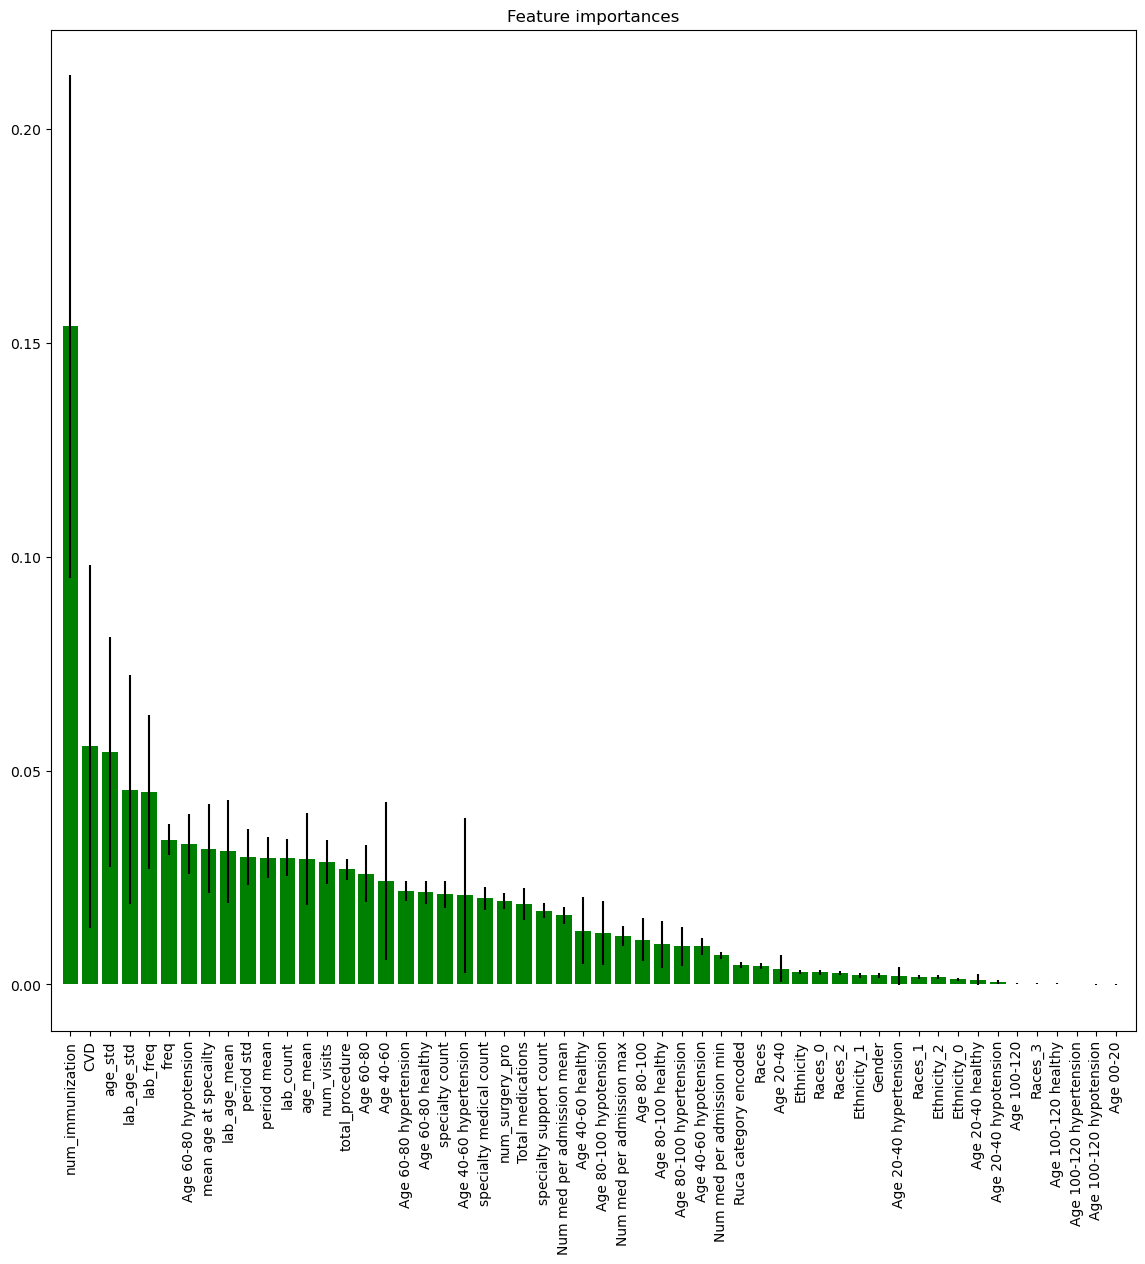

In [11]:
features_to_keep_ad_rf = rf_importance_score(X_all, y_all)

/tmp/ipykernel_331199/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


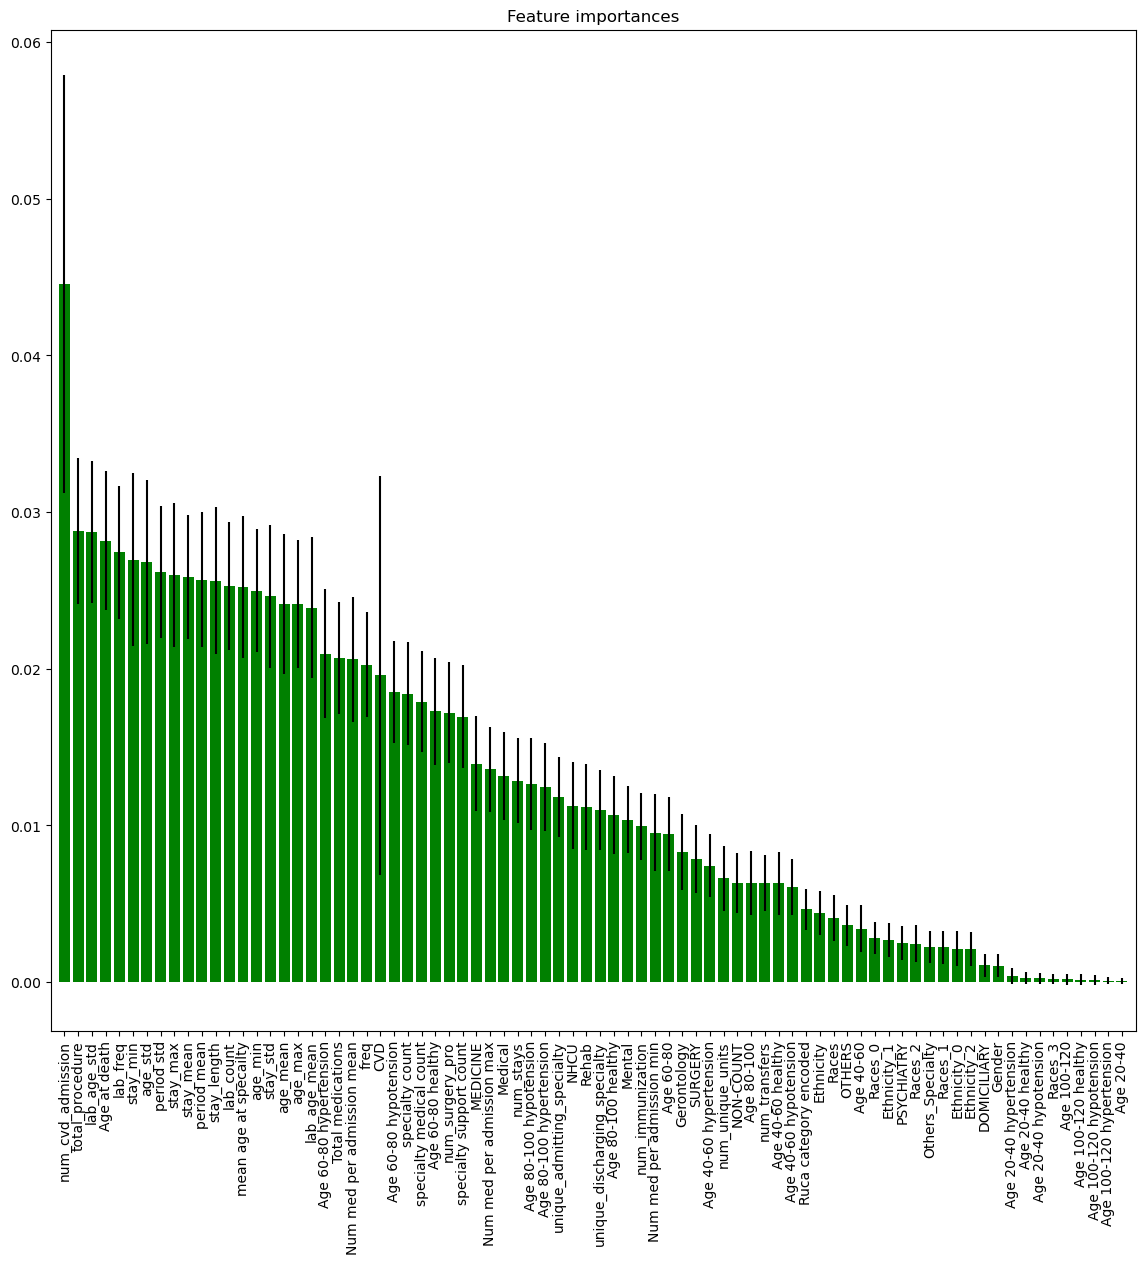

In [12]:
features_to_keep_ad_cvd_rf = rf_importance_score(X_cvd, y_cvd)

### Principle component analysis (PCA)

Fundemental dimension reduction technique

first step is decorrelation:

rotates data samples to be aligned with axes
shifts data asmples so they have mean zero
no information lost

fit() : learn how to shift samples

transform(): apply the learned transformation. It can also be applies test data

Resulting PCA features are not linearly correlated

Principle components: directions of variance

In [13]:
def PCA_ncomponent(X):
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)

    from sklearn.decomposition import PCA
    # Number of components to keep. if n_components is not set all components are kept:
    pca = PCA() 
    pca.fit(X_sc)

    plt.figure(1, figsize=(14, 13))
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.grid(True)
    plt.xlabel('n components')
    plt.ylabel('explained variance ratio')

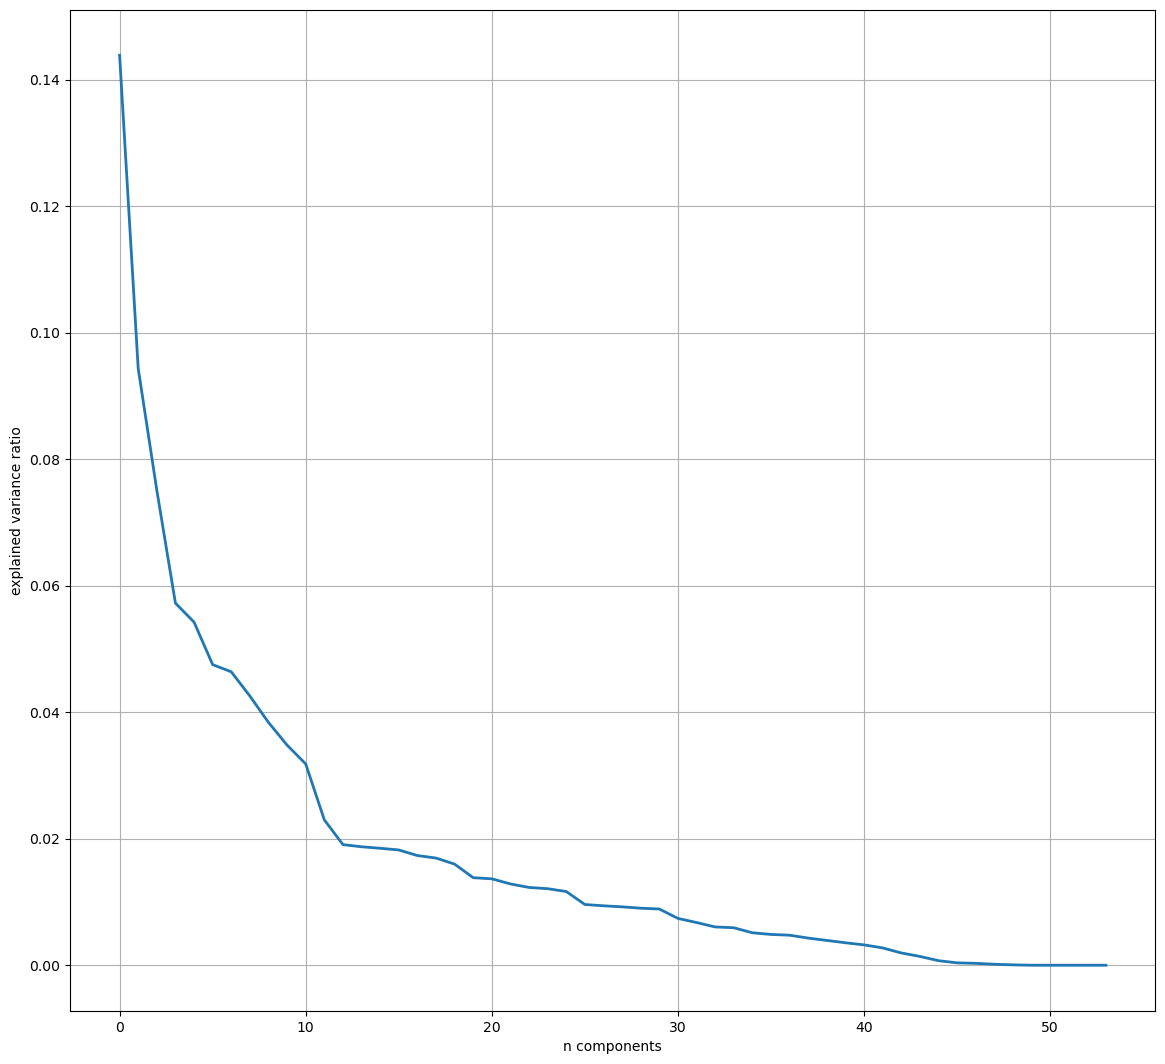

In [14]:
PCA_ncomponent(X_all)

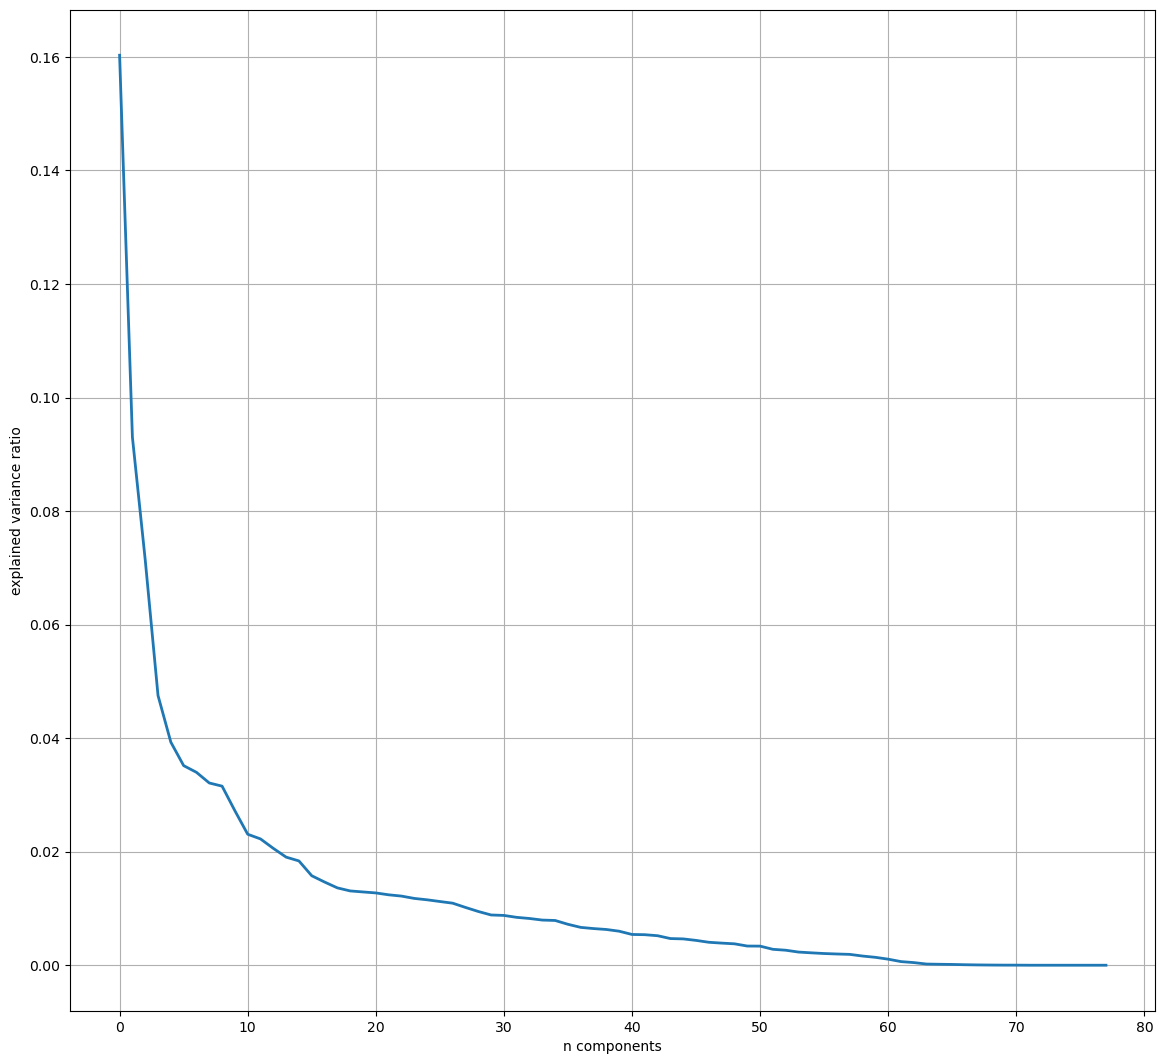

In [15]:
PCA_ncomponent(X_cvd)

In [16]:
def PCA_select(X, n_num):    
    pca = PCA(n_num) 
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    pca.fit(X_sc)
    # The components are sorted by decreasing explained_variance_.
    n_pcs= pca.components_.shape[0]

    # get the index of the most important feature on EACH component
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    # get the names
    most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    features_to_keep_pca = list(dic.values())
    return features_to_keep_pca

In [17]:
features_to_keep_ad_pca = PCA_select(X_all, 18)

In [18]:
features_to_keep_ad_cvd_pca = PCA_select(X_cvd, 18)

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# find best scored 20 features
# chi2: score function
def SelectBestK(X, y, n_num):
    select_feature = SelectKBest(chi2, k=n_num).fit(X, y)
    #print('Score list:', select_feature.scores_)
    #print('Feature list:', X.columns)
    score_df = pd.DataFrame({'Name':X.columns, 'Score':select_feature.scores_})
    score_df.sort_values(by = 'Score').reset_index(drop =True)
    score_list = list(zip(X.columns,select_feature.scores_))
    score_list = sorted(score_list, key = lambda x: x[1],reverse=True)
    features_to_keep_bestk = [name for name,score in score_list]
    return features_to_keep_bestk


In [20]:
features_to_keep_ad_bestk = SelectBestK(X_all, y_all, 20)

In [21]:
features_to_keep_ad_cvd_bestk = SelectBestK(X_cvd, y_cvd, 20)

In [22]:
set(features_to_keep_ad_rf[:20]).intersection(features_to_keep_ad_bestk[:20])

{'Age 40-60',
 'Age 60-80',
 'Age 60-80 hypotension',
 'freq',
 'lab_count',
 'lab_freq',
 'num_visits',
 'period std',
 'total_procedure'}

In [23]:
set(features_to_keep_ad_cvd_rf[:20]).intersection(features_to_keep_ad_cvd_bestk[:20])

{'Age 60-80 hypertension',
 'lab_count',
 'lab_freq',
 'num_cvd_admission',
 'period mean',
 'period std',
 'stay_length',
 'stay_max',
 'stay_mean',
 'stay_min',
 'total_procedure'}